# Polar Plots (Polar, Radar, Wind Rose)

## Overview
Polar charts plot data in (angle, radius) instead of (x, y). They are useful for cyclic phenomena like time-of-day, direction (wind), seasonality, or phase.

### What you'll learn
- Polar axes and coordinate basics
- Polar line/scatter plots
- Polar bar charts for wind-rose style visuals
- Radar charts (spider plots) for multi-metric comparison
- Best practices: labeling, angle direction, and avoiding distortion


In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
np.random.seed(42)
print('✅ Setup complete')

✅ Setup complete


## 1. Polar Axes Basics

### Create polar axes
```python
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
```

### Useful axis controls
```python
ax.set_theta_zero_location('N')   # 0° at North
ax.set_theta_direction(-1)        # Clockwise angles
ax.set_rlabel_position(225)       # Move radial labels
ax.set_ylim(0, 10)                # Radial limits
```
### Angle units
Matplotlib expects angles in **radians**. Convert degrees using `np.deg2rad(deg)`.


=== BASIC POLAR LINE ===


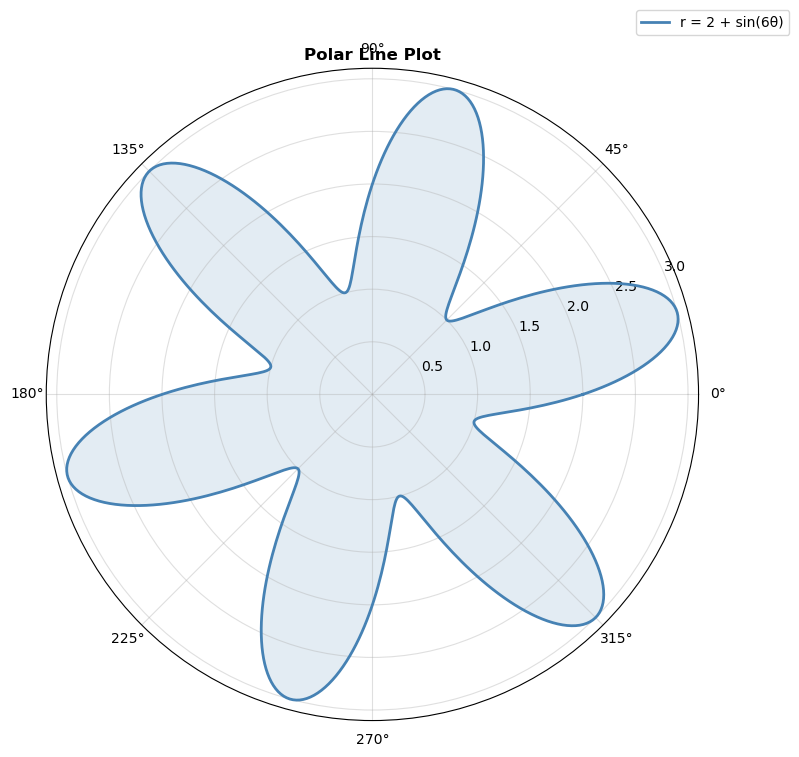

In [2]:
print('=== BASIC POLAR LINE ===')
theta = np.linspace(0, 2*np.pi, 600)
r = 2 + np.sin(6*theta)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.plot(theta, r, color='steelblue', linewidth=2, label='r = 2 + sin(6θ)')
ax.fill(theta, r, color='steelblue', alpha=0.15)
ax.set_title('Polar Line Plot', fontweight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.1))
ax.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

## 2. Polar Scatter (extra dimensions)

Polar scatter is useful when each observation has a direction (angle) and magnitude (radius). Color/size can represent extra dimensions.

```python
ax.scatter(theta, r, c=value, s=size, cmap='viridis')
plt.colorbar(...)
```


=== POLAR SCATTER ===


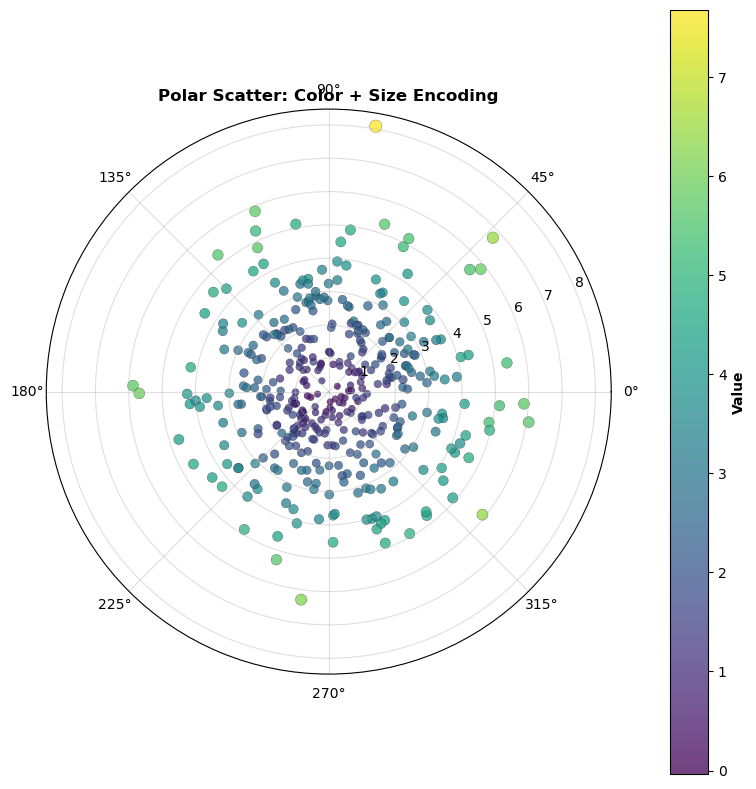

In [3]:
print('=== POLAR SCATTER ===')
n = 400
theta = np.random.uniform(0, 2*np.pi, n)
r = np.random.rayleigh(scale=2.0, size=n)
val = r + 0.3*np.random.randn(n)
sizes = 20 + 60*(r / r.max())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
sc = ax.scatter(theta, r, c=val, s=sizes, cmap='viridis', alpha=0.75, edgecolor='k', linewidth=0.2)
ax.set_title('Polar Scatter: Color + Size Encoding', fontweight='bold')
cbar = plt.colorbar(sc, ax=ax, pad=0.08)
cbar.set_label('Value', fontweight='bold')
ax.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

## 3. Wind Rose (Polar Bar Histogram)

A wind rose summarizes how often wind blows from each direction, optionally split by wind speed bins.

### Core idea
- Bin directions into sectors (e.g., 16 sectors = 22.5° each).
- For each sector, compute frequency (or split into speed bins).
- Plot polar bars with `ax.bar(theta_centers, freq, width=sector_width)`.


=== SIMPLE WIND ROSE (DIRECTION FREQUENCY) ===


/var/folders/d1/sfvddbbx4tg14yxq7trqmhyw0000gn/T/ipykernel_45154/3847696587.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(y*100)}%' for y in ax.get_yticks()])


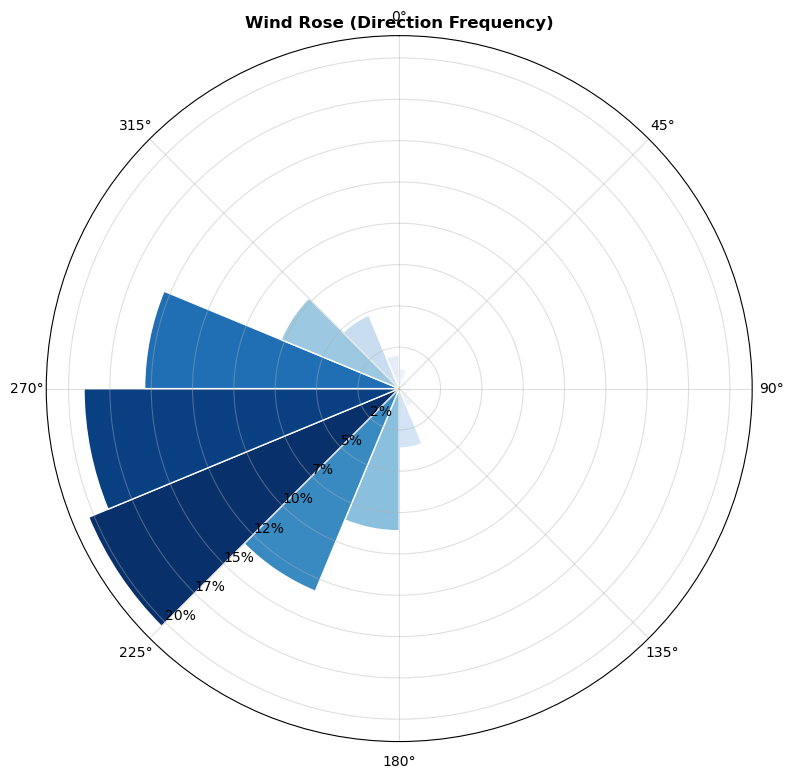

In [4]:
print('=== SIMPLE WIND ROSE (DIRECTION FREQUENCY) ===')
# Synthetic wind directions (deg) and speeds
n = 1500
wind_dir = (np.random.vonmises(mu=np.deg2rad(250), kappa=2.0, size=n) % (2*np.pi))
wind_spd = np.random.gamma(shape=2.0, scale=2.0, size=n)

# Direction bins (16 sectors)
n_sectors = 16
edges = np.linspace(0, 2*np.pi, n_sectors + 1)
counts, _ = np.histogram(wind_dir, bins=edges)
freq = counts / counts.sum()

theta_centers = (edges[:-1] + edges[1:]) / 2
width = (2*np.pi) / n_sectors

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(theta_centers, freq, width=width, bottom=0.0,
              color=plt.cm.Blues(freq / freq.max()), edgecolor='white', linewidth=1)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Wind Rose (Direction Frequency)', fontweight='bold')
ax.set_rlabel_position(225)
ax.set_yticklabels([f'{int(y*100)}%' for y in ax.get_yticks()])
ax.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

## 4. Radar Chart (Spider Plot)

Radar charts compare multiple metrics on the same scale. They can look impressive but require careful normalization and labeling.

### Best practice for radar
- Normalize all metrics to a common scale (0–1 or 0–100).
- Use few series (2–4) to avoid clutter.
- Prefer line + light fill; keep grid subtle.


=== RADAR CHART (NORMALIZED METRICS) ===


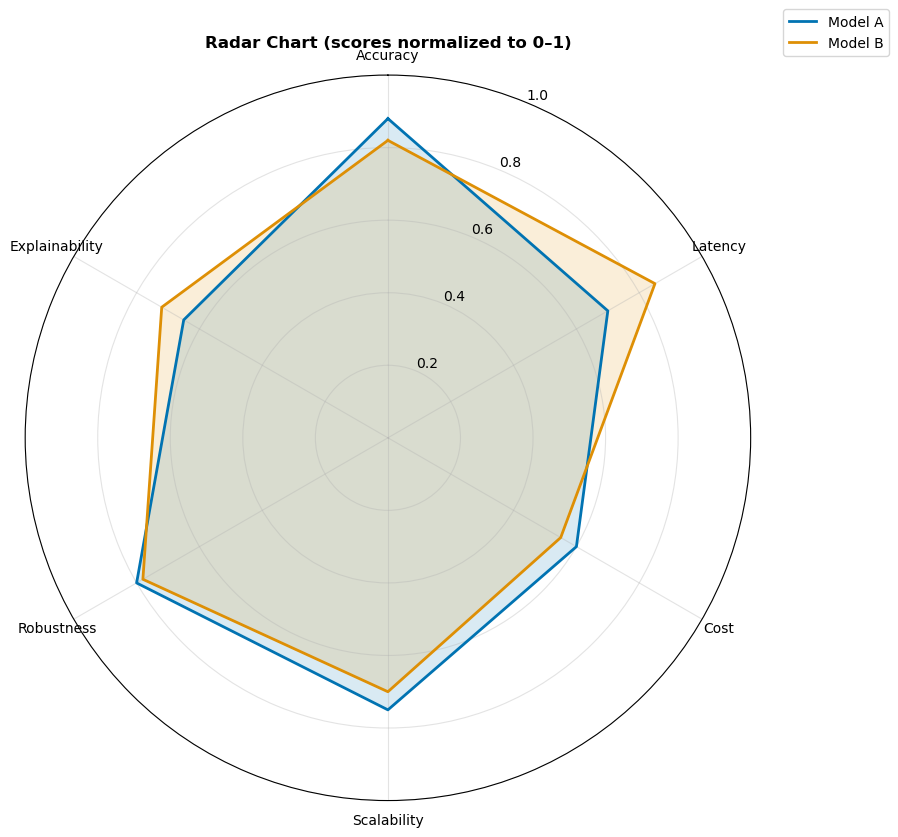

In [5]:
print('=== RADAR CHART (NORMALIZED METRICS) ===')
labels = ['Accuracy', 'Latency', 'Cost', 'Scalability', 'Robustness', 'Explainability']
N = len(labels)

# Two systems with scores 0..100 (example)
model_a = np.array([88, 70, 60, 75, 80, 65])
model_b = np.array([82, 85, 55, 70, 78, 72])

# Normalize to 0..1
A = model_a / 100
B = model_b / 100

angles = np.linspace(0, 2*np.pi, N, endpoint=False)
angles = np.concatenate([angles, [angles[0]]])
A = np.concatenate([A, [A[0]]])
B = np.concatenate([B, [B[0]]])

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={'projection': 'polar'})
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 1)

ax.plot(angles, A, color='#0173B2', linewidth=2, label='Model A')
ax.fill(angles, A, color='#0173B2', alpha=0.15)

ax.plot(angles, B, color='#DE8F05', linewidth=2, label='Model B')
ax.fill(angles, B, color='#DE8F05', alpha=0.15)

ax.set_title('Radar Chart (scores normalized to 0–1)', fontweight='bold', pad=20)
ax.grid(True, alpha=0.35)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

## Practice + Quick Reference

### Practice
1. Make a polar plot for a cyclic time-series (hour-of-day vs demand).
2. Build a wind rose with 8 vs 32 direction sectors and compare interpretability.
3. Create a radar chart for 3 models; normalize metrics first.

### Quick reference
```python
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.scatter(theta, r, c=v, cmap='viridis')
ax.bar(theta_centers, freq, width=sector_width)
ax.set_theta_zero_location('N'); ax.set_theta_direction(-1)
```
